# Analysis of Results from wcc_logreg_prereqs_iterate

In [1]:
import numpy as np
import pandas as pd
import pickle
import tqdm.auto as tqdm
from pprint import pprint
import collections
import random
import feather
import matplotlib.pyplot as plt

In [9]:
full = pd.read_csv("../results/genderTrue_gpaFalse_x1success_y1success_full_Abdallah.csv")
prereq = pd.read_csv("../results/genderTrue_gpaFalse_x1success_y1success_prereq_Abdallah.csv")

In [3]:
full.columns

Index(['Unnamed: 0', 'course_name', 'train_score', 'test_score',
       'train_groundtruth', 'test_groundtruth', 'train_size', 'test_size',
       'precision', 'recall', 'f1_score'],
      dtype='object')

In [4]:
# full = full.loc[(full['course_name'].isin(list(prereq['course_name'])))]

In [10]:
def basicPlot(full_data, prereq_data, x, y, average=True):
    ax = full_data.plot.scatter(x=x, y=y, color='DarkBlue', label='full', figsize=(10, 8))
    prereq_data.plot.scatter(x=x, y=y, color='DarkGreen', label='prereq', ax=ax)
    if average:
        ax.axhline(y=np.mean(list(full_data[y])), color='DarkBlue')
        ax.axhline(y=np.mean(list(prereq_data[y])), color='DarkGreen')
    plt.show()

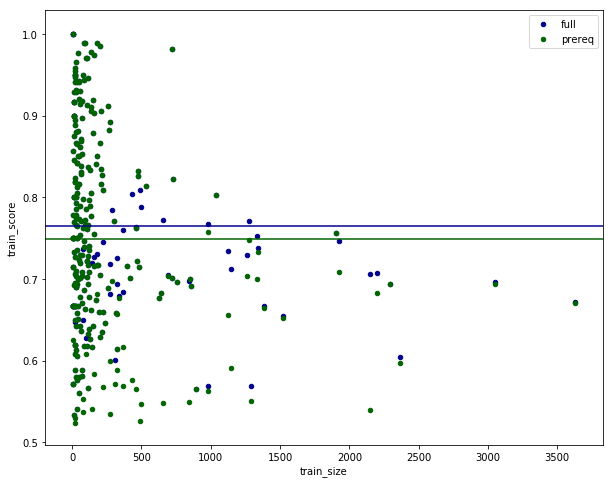

In [11]:
basicPlot(full, prereq, "train_size", "train_score")

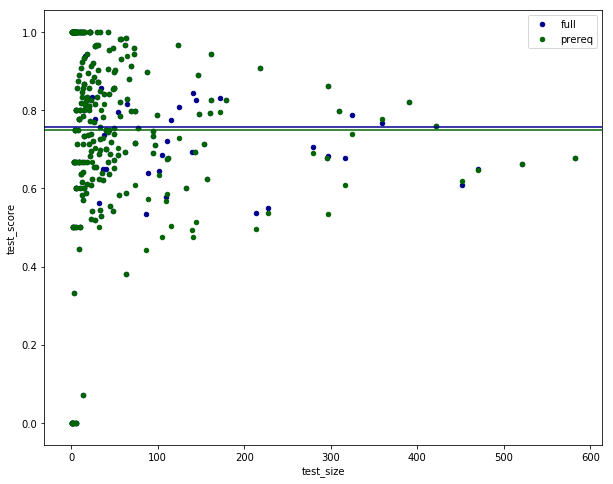

In [12]:
basicPlot(full, prereq, "test_size", "test_score")

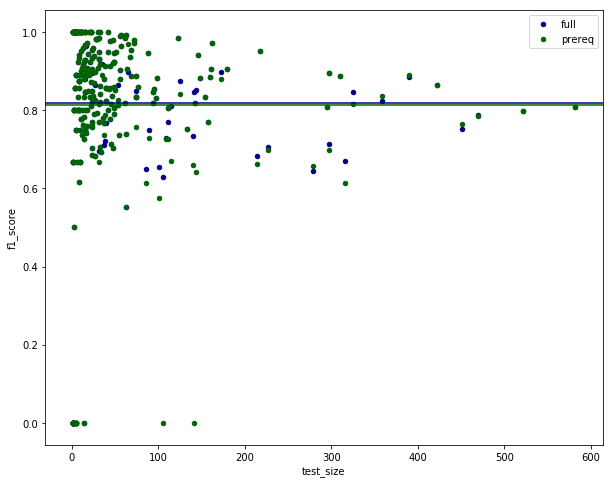

In [13]:
basicPlot(full, prereq, "test_size", "f1_score")

In [14]:
prereq.sort_values('course_name', inplace=True)
prereq = prereq.reset_index(drop=True)

In [15]:
full.sort_values('course_name', inplace=True)
full = full.reset_index(drop=True)

In [16]:
f1_score_prereq = []
test_score_prereq = []
train_score_prereq = []
for i in range(len(full)) : 
    if prereq.loc[i, "f1_score"] > full.loc[i, "f1_score"]:
        f1_score_prereq.append(prereq.loc[i, "course_name"])
    if prereq.loc[i, "train_score"] > full.loc[i, "train_score"]:
        train_score_prereq.append(prereq.loc[i, "course_name"])
    if prereq.loc[i, "test_score"] > full.loc[i, "test_score"]:
        test_score_prereq.append(prereq.loc[i, "course_name"])

In [17]:
f1_score_prereq

['CHEM35',
 'CS107',
 'CS109',
 'CS110',
 'CS144',
 'EE253',
 'MATH51',
 'ME161',
 'MS&E111',
 'STATS200']

In [18]:
full_subset = full.loc[(full['course_name'].isin(f1_score_prereq))]
prereq_subset = prereq.loc[(full['course_name'].isin(f1_score_prereq))]

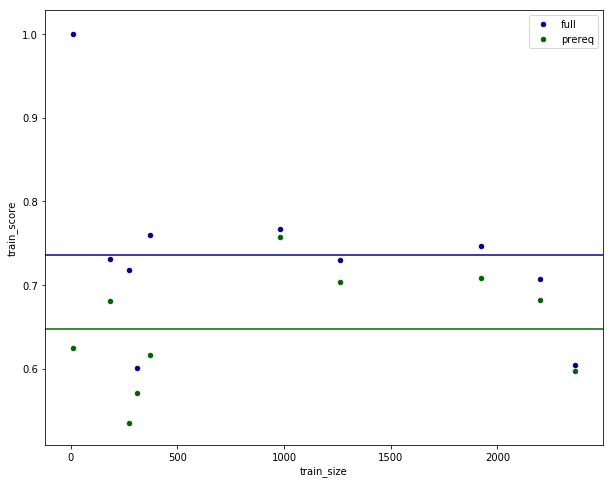

In [19]:
basicPlot(full_subset, prereq_subset, "train_size", "train_score")

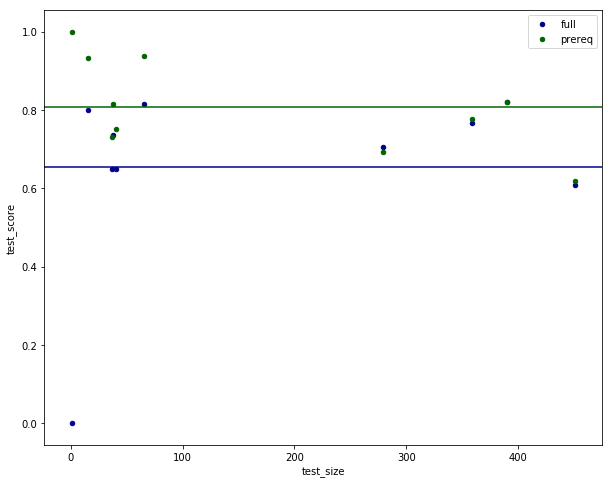

In [20]:
basicPlot(full_subset, prereq_subset, "test_size", "test_score")

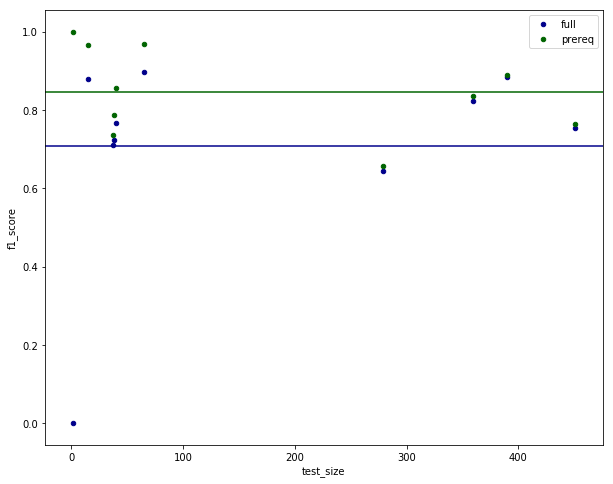

In [21]:
basicPlot(full_subset, prereq_subset, "test_size", "f1_score")